
# Project: Investigate a Dataset (No Show Appointments - Kaggle)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I'm about to investigate contains over 100k medical appointment records taken from various clinics in Brazil. The dataset is focused on whether or not patiets show up for appointment. Several factors may be responsible for patients not showing up for appointments that they took out time to book for. So, i'll be investigating the dataset to see if any of the details of the patients given as variables have any effect on the patients' response to medical appointments.

The dataset is made up of 13 independent variables and one dependent variable. These variables are self explanatory but for the sake of better understanding, i'll be giving a brief explanation of each variable below.


### DESCRIPTION OF THE VARIABLES
1.   Patient ID: The unique Identification of each patient.
2.   Appointment ID: The Identification of each appointment.
3.   Gender: The gender of each patient, Male or Female.
4.   Scheduled Day: The day at which the patient set up his appointment.
5.   Appointment Day: The day at which the patient should show up for his appointment.
6.   Age: The age of each patient.
7.   Neighbourhood: The place at which the appointment takes place.
8.   Scholarship: It indicates whether the patient is enrolled in Brasilian welfare program or not.
        https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
9.   Hypertension: It indicates whether the patient suffers from Hypertension or not.
10.  Diabetes: It indicates whether the patient suffers from Diabetes or not.
11.  Alcoholism: It indicates whether the patient suffers from Alcoholism or not.
12.  Handicap: This indicates the number of handicaps that the patient has.
13.  SMS_received: It indicates whether the patient received SMS or not.
14.  No-show: It indicates whether the patient showed up for the appointment or not. ‘No’ is used to indicate that a patient showed up for their appointment, and ‘Yes’ is used if they did not show up.
    
    I got the description of the above variables from the website below and the dataset options page.
    https://www.kaggle.com/code/omarashraffathy/no-show-appointments-dataset-analysis


### QUESTIONS FOR ANALYSIS
1.   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2.   What is the ratio of patients who showed up for appointment to those who didn't show up?
3.   Does the age of the patient determine their response to appointments?
4.   Does the gender of the patients determine their response to appointments?
5.   Does the type of ailment the patients have determine their response to appointments?
6.   What is the relationship between alcoholism and patients' response to appointments?
7.   What is the relationship between being handicapped and response to appointment?
8.   Is there a relationship between not receiving an sms and missing the appointment?

I'll be answering these questions by analysing the dataset.


In [1]:
# To import the different libraries that may be needed for this investigation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
In this section of the investigation, I will be carrying out data wrangling which involves gathering, assessing and cleaning the data.
1.   The first step is the gathering which will be done by loading the selected dataset.
2.   Next is the assessing of data. This will be done by checking for the following attributes:
(i)   The shape of the dataset
(ii)  The datatypes of the columns in the dataset
(iii) Missing values
(iv)  Incorrect values
(v)   Duplicates
3.   Lastly, i'll be cleaning the dataset based on the findings from the preceding step.


In [2]:
# To load the data.
df = pd.read_csv(r"C:\Users\hp\Downloads\noshowappointments-kagglev2-may-2016.csv")

# To comfirm if the data was properly loaded
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset is properly loaded and the first five rows of the dataset are displayed.

In [3]:
# To check for the number of rows and columns in the dataset
df.shape

(110527, 14)

The dataset contains a total of 110527 records (which represents the rows) and a total of 14 columns.

In [4]:
# To check for the datatypes of each column.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

All the datatypes are correct except for ScheduledDay and AppointmentDay which are strings instead of datetime. Since both variables are irrelevant to this investigation, i'll rather skip converting it to datetime.

In [5]:
# To view a summary of the dataframe, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The above summary shows that there are no null values in the dataset but to be double sure, let's check for null values in our dataset.

In [6]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

So, there are no null or missing values in our dataset.

In [7]:
# To check for the number of unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# To view basic statistical information about the dataset.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the statistical information given about the dataset, the mean age is 37years while the maximum age is 115years. We can also see that the Age column has an incorrect value (which is the minimum age value). This will be cleaned in the data cleaning section.

In [9]:
# To find the total number of duplicate rows.
sum(df.duplicated())

0

The output of the above code shows that there are no duplicate rows in the dataset and therefore no cleaning is required with regards duplicate rows.

### DATA CLEANING SECTION
From the data assessing done above, there are no missing values nor duplicates in our dataset. Only the column with the incorrect value will be cleaned. This will be done by first checking for the number of this incorrect value and if they are minimal, they will be dropped. 
I'll also rename some incorrectly spelt variables and those that were not properly separated, for the sake of consistency and better understanding.

In [27]:
def value_counter(column):
    return column.value_counts()

In [28]:
# Calling the value counter function to check the value counts for the Age column to find out the number of incorrect values.
value_counter(df['Age'])

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Since there is just one incorrect value which is -1, I will drop the row where this value is foundd. This will be done in the next cell.

In [11]:
df.drop(df.query("Age == -1").index,inplace=True)

In [30]:
# Let's check to see if it was correctly dropped.
value_counter(df['Age'])

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [13]:
# To check for the column names.
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [14]:
# To rename some incorrectly spelt variables and those that were not properly separated.
df.rename(columns={'PatientId':'Patient_id', 'AppointmentID':'Appointment_id','ScheduledDay':'Scheduled_day',
                   'AppointmentDay':'Appointment_day', 'Hipertension':'Hypertension',
                   'Handcap':'Handicap','No-show':'No_show'}, inplace=True)

# confirm changes by checking the first five rows.
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# <a id='eda'></a>
## Exploratory Data Analysis

In this section of the data analysis which is the exploratory data analysis, i'll be addressing the research questions given in the introduction section. This will be done by using some statistics and visualizations to compare several variables to determine if any of those variables affect or determine the response of the patients to medical appointments. 



### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

To answer this question, i'll check for the value counts of each variable in the dataset and also plot histogram for some of the dataset.


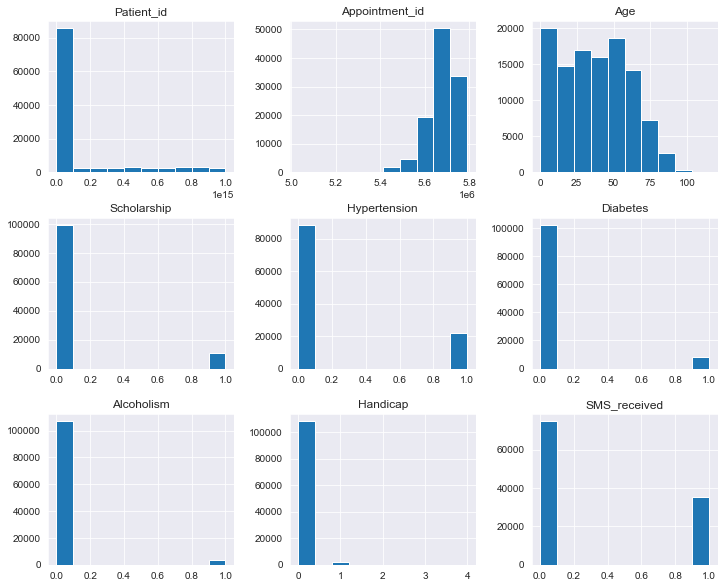

In [31]:
# To visualize the distribution of the various variables.
df.hist(figsize=(12,10));

I think the important factors to consider here are age, presence of ailments such as hypertension and diabetes, presence of alcoholism, presence of one or more handicap, and whether or not SMS was received.
Although the patients are evenly distributed among the different age groups, there seem to be more younger patients than older ones.
Majority of the patients do not have hypertension, diabetes, alcoholism and handicap.
Some of the patients received SMS but majority of them didn't receive SMS.


### Research Question 2 (What is the ratio of patients who showed up for appointment to those who didn't show up?)


In [29]:
# Calling the value counter function to find out the count of unique values for those who showed up and those who did not.
value_counter(df['No_show'])

No     88207
Yes    22319
Name: No_show, dtype: int64

(-1.1008046422153708, 1.10003831629597, -1.101203746507946, 1.100466289584211)

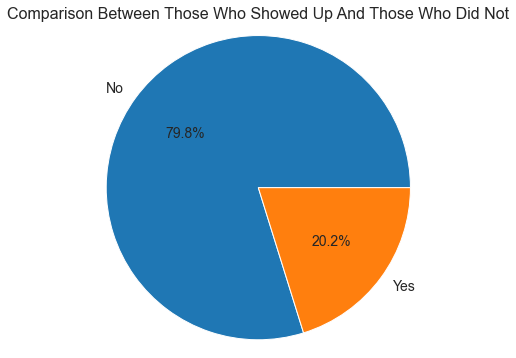

In [104]:
# Using pie chart to check for the amount of those who showed up in relation to those who didn't.
response = value_counter(df['No_show'])
plt.figure(figsize=(6,6))
plt.pie(response, labels=('No', 'Yes'), autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Comparison Between Those Who Showed Up And Those Who Did Not', fontsize=16)
plt.axis('equal')

From the pie chart above, it can be seen that the number of patients who did not show up for appointment is far lesser than those who showed up for appointment. 79.8% of the patients showed up for their appointment whereas, only 20.2% didn't show up.


Note that I had to read up how to add percentage values to pie chart and how to increase the font size from the websites below.
https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python

https://www.tutorialsandyou.com/matplotlib/how-to-show-percentage-and-value-in-matplotlib-pie-chart-12.html


### Research Question 3 (Does the age of the patient determine their response to appointments?)


In [18]:
# Create two dataframes to separate people who showed up for appointment and those who didn't.
df_show = df[df['No_show'] == 'No']
df_noshow = df[df['No_show'] == 'Yes']

In [79]:
# To get some statistical information about the ages of the patients.
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The average age of the patients is 37. As we can see, 25% of the patients are 18 whereas 75% are 56. The oldest is 115.

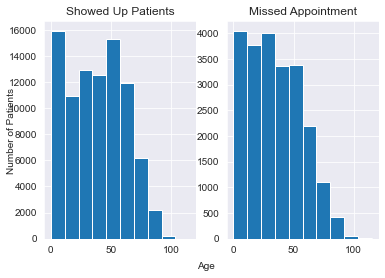

In [33]:
# Distribution of age by response to appointment.
fig, axes = plt.subplots(1,2)
df.Age[df.No_show == 'No'].hist(label='showed', ax=axes[0])
df.Age[df.No_show == 'Yes'].hist(label='showed', ax=axes[1])

axes[0].set_title('Showed Up Patients')
axes[1].set_title('Missed Appointment')

fig.text(0.5, 0.02, 'Age', ha='center');
fig.text(0.04, 0.5, 'Number of Patients', va='center', rotation='vertical');

[Text(0.5, 1.0, 'Response to Appointment Based on Age')]

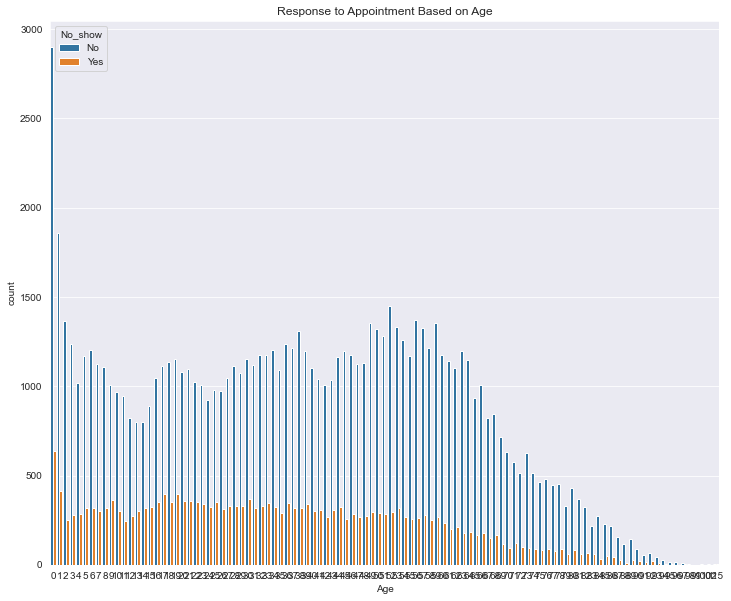

In [58]:
# To visualize the effect of age on response to appointment.
plt.figure(figsize=(12,10))
sns.countplot(x='Age', hue='No_show', data=df).set(title='Response to Appointment Based on Age')

From the plots above, it seems like the majority of patients who showed up and didn't show up are the younger ones. So i think it will be safe to say that the age distribution really doesn't determine the response of the patients to appointment.


### Research Question 4 (Does the gender of the patients determine their response to appointments?)

In [59]:
# To find out the count of unique values under the gender column.
value_counter(df['Gender'])

F    71839
M    38687
Name: Gender, dtype: int64

From the above code, it can be seen that the number of females is greater that the number of males. 

In [103]:
# To use groupby to get the gender count for each response to appointment.
value_counter(df.groupby(['No_show'])['Gender'])

No_show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

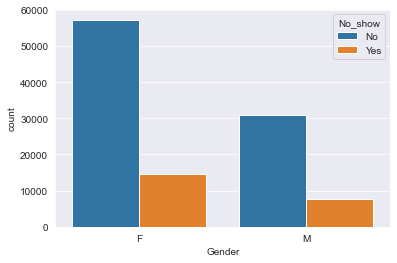

In [37]:
# To visualize the effect of gender on response to appointment.
sns.countplot(x='Gender', hue='No_show', data=df)

From the above analysis and plot, it can be seen that among the number of patients that show up for appointments, the females are more. This may be due to the fact that there are more females patients than males in this dataset. From the plot it can be seen that the gender of the patients really has no effect on whether the they show up for appointment or not.


### Research Question 5 (Does the type of ailment the patients have determine their response to appointments?)

I'll make use of bar charts to compare the presence or effect of ailments such as hypertension and diabetes in both groups of response to appointments.


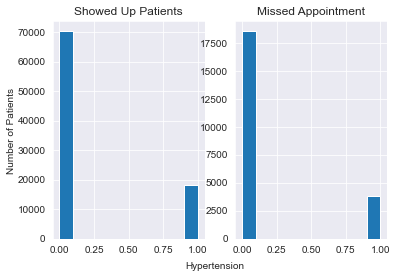

In [86]:
# Distribution of Hypertension by response to appointment.
fig, axes = plt.subplots(1,2)
df.Hypertension[df.No_show == 'No'].hist(label='showed', ax=axes[0])
df.Hypertension[df.No_show == 'Yes'].hist(label='showed', ax=axes[1])

axes[0].set_title('Showed Up Patients')
axes[1].set_title('Missed Appointment')

fig.text(0.5, 0.02, 'Hypertension', ha='center');
fig.text(0.02, 0.5, 'Number of Patients', va='center', rotation='vertical');

Text(0, 0.5, 'Count')

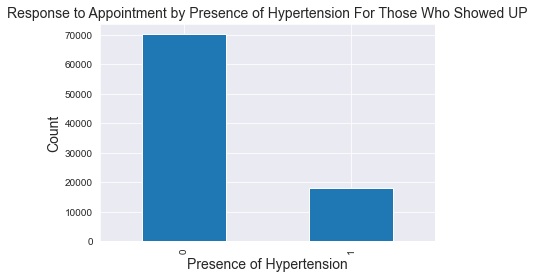

In [102]:
# Use bar graphs to compare the effect of hypertension on those who show up for appointment.
value_counter(df_show['Hypertension']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Hypertension For Those Who Showed UP', fontsize=14)
plt.xlabel('Presence of Hypertension', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

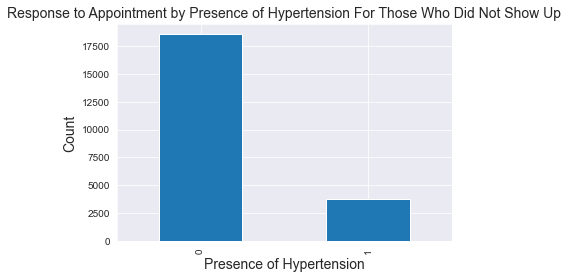

In [101]:
# Use bar graphs to compare the effect of hypertension on those that do not show up for appointment.
value_counter(df_noshow['Hypertension']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Hypertension For Those Who Did Not Show Up', fontsize=14)
plt.xlabel('Presence of Hypertension', fontsize=14)
plt.ylabel('Count', fontsize=14)

[Text(0.5, 1.0, 'Response to Appointment Based on Presence or Absence of Hypertension')]

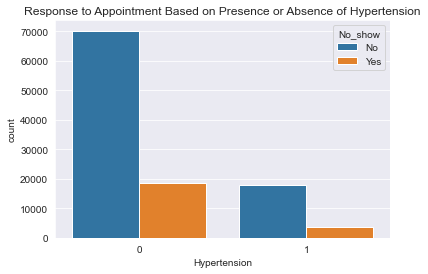

In [40]:
# To visualize the effect of hypertension on response to appointment.
sns.countplot(x='Hypertension', hue='No_show', data=df).set(title='Response to Appointment Based on Presence or Absence of Hypertension')

From the above, it can be seen that the larger majority of those who showed up or didn't show up for appointment did not have hypertension.

Text(0, 0.5, 'Number of Patients')

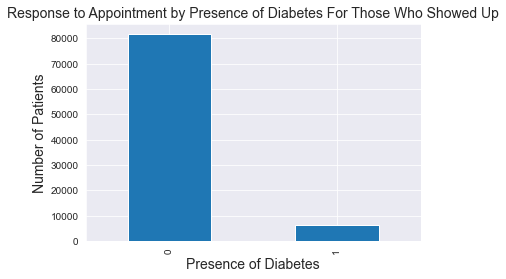

In [100]:
# Use bar graphs to compare the effect of diabetes on those who show up for appointment.
value_counter(df_show['Diabetes']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Diabetes For Those Who Showed Up', fontsize=14)
plt.xlabel('Presence of Diabetes', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

Text(0, 0.5, 'Count')

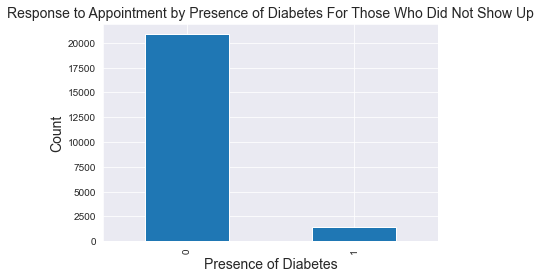

In [99]:
# Use bar graphs to compare the effect of diabetes on those who do not show up for appointment.
value_counter(df_noshow['Diabetes']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Diabetes For Those Who Did Not Show Up', fontsize=14)
plt.xlabel('Presence of Diabetes', fontsize=14)
plt.ylabel('Count', fontsize=14)

[Text(0.5, 1.0, 'Response to Appointment Based on Presence or Absence of Diabetes')]

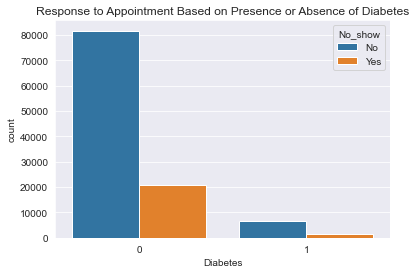

In [43]:
# To visualize the effect of diabetes on response to appointment.
sns.countplot(x='Diabetes', hue='No_show', data=df).set(title='Response to Appointment Based on Presence or Absence of Diabetes')

Just like in the case of hypertension, it can also be seen that the larger majority of those who showed up or didn't show up for appointment did not have diabetes. This goes to show that the type of ailment really doesn't affect the patients' response to medical appointment.


### Research Question 6 (What is the relationship between alcoholism and patients response to appointments?)

I'll also make use of bar charts to compare the effects of alcoholism on both groups of response to appointments.


Text(0, 0.5, 'Number of Patients')

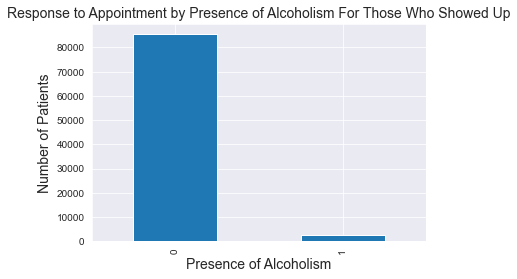

In [98]:
# Use bar graphs to compare the effect of alcoholism on those who show up for appointment.
value_counter(df_show['Alcoholism']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Alcoholism For Those Who Showed Up', fontsize=14)
plt.xlabel('Presence of Alcoholism', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

Text(0, 0.5, 'Number of Patients')

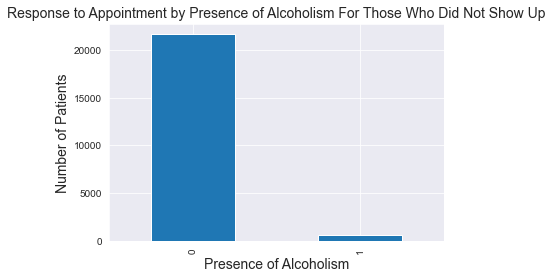

In [97]:
# Use bar graphs to compare the effect of alcoholism on those that do not show up for appointment.
value_counter(df_noshow['Alcoholism']).plot(kind='bar');
plt.title('Response to Appointment by Presence of Alcoholism For Those Who Did Not Show Up', fontsize=14)
plt.xlabel('Presence of Alcoholism', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

The above plots show that the larger majority of those who showed up or didn't show up for appointment were not suffering from alcoholism. This goes to show that the presence or absence really doesn't affect the patients' response to medical appointment.

### Research Question 7  (What is the relationship between being handicapped and response to appointment?)

In [96]:
# To use groupby to get the handicap count for each response to appointment.
value_counter(df.groupby(['No_show'])['Handicap'])

No_show  Handicap
No       0           86373
         1            1676
         2             146
         3              10
         4               2
Yes      0           21912
         1             366
         2              37
         3               3
         4               1
Name: Handicap, dtype: int64

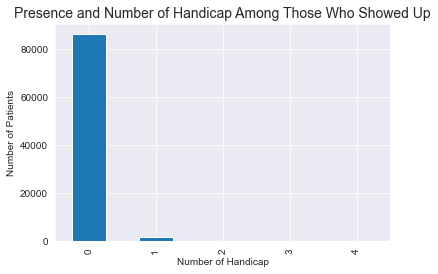

In [88]:
# Use bar graphs to compare the presence of handicap with those who show up for appointment.
value_counter(df_show['Handicap']).plot(kind='bar');
plt.xlabel('Number of Handicap')
plt.ylabel('Number of Patients')
plt.title('Presence and Number of Handicap Among Those Who Showed Up', fontsize=14)
plt.grid(True)

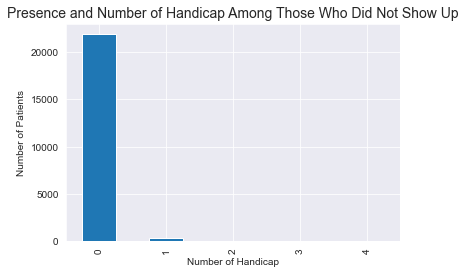

In [89]:
# Use bar graphs to compare the presence of handicap with those who do not show up for appointment.
value_counter(df_noshow['Handicap']).plot(kind='bar');
plt.xlabel('Number of Handicap')
plt.ylabel('Number of Patients')
plt.title('Presence and Number of Handicap Among Those Who Did Not Show Up', fontsize=14)
plt.grid(True)

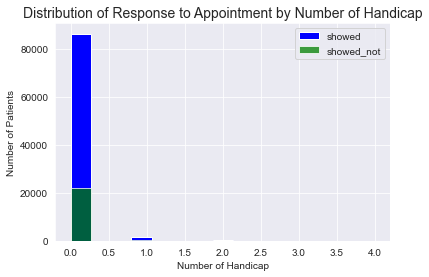

In [49]:
plt.hist(df_show['Handicap'], 15, facecolor='b', alpha=1, label='showed');
plt.hist(df_noshow['Handicap'], 15, facecolor='g', alpha=0.75, label='showed_not');
plt.legend()
plt.xlabel('Number of Handicap')
plt.ylabel('Number of Patients')
plt.title('Distribution of Response to Appointment by Number of Handicap', fontsize=14)
plt.grid(True)

[Text(0.5, 1.0, 'Response to Appointment Based on Presence or Number of Handicap')]

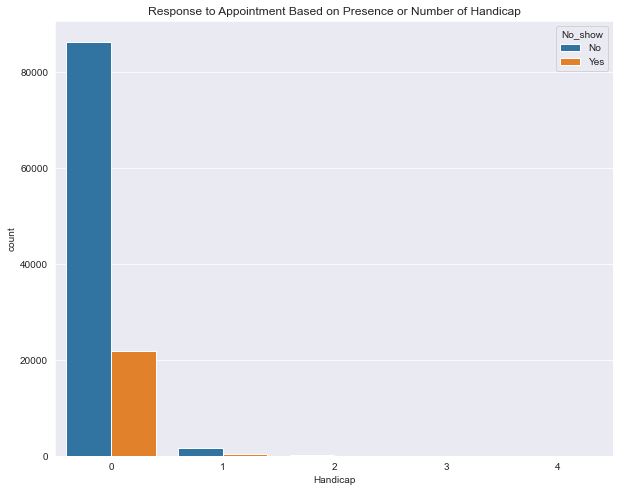

In [50]:
# To visualize the effect of handicap on response to appointment.
plt.figure(figsize=(10,8))
sns.countplot(x='Handicap', hue='No_show', data=df).set(title='Response to Appointment Based on Presence or Number of Handicap')

The majority of those who showed up for appointment and those who didn't do not have any form of handicap. Even those who had at least 1 handicap, majority of them showed up for appointment. This shows that a patient's response to appointment is not necessarily affected by the presence or absence of handicap.

### Research Question 8  (Is there a relationship between not receiving an sms and missing the appointment?)

In [51]:
# To show the unique values under the SMS_received column.
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [90]:
# To find out the count of unique values under the SMS_received column.
value_counter(df['SMS_received'])

0    75044
1    35482
Name: SMS_received, dtype: int64

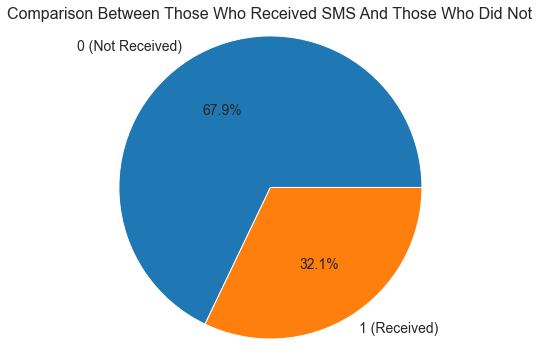

In [92]:
# Using pie chart to check for the amount of patients who received SMS and those who didn't.
text_msg = value_counter(df['SMS_received'])
plt.figure(figsize=(6,6))
plt.pie(text_msg, labels=('0 (Not Received)', '1 (Received)'), autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Comparison Between Those Who Received SMS And Those Who Did Not', fontsize=16)
plt.axis('equal')
plt.show()

About 32.1% of the patients received SMS while the other 67.9% did not.

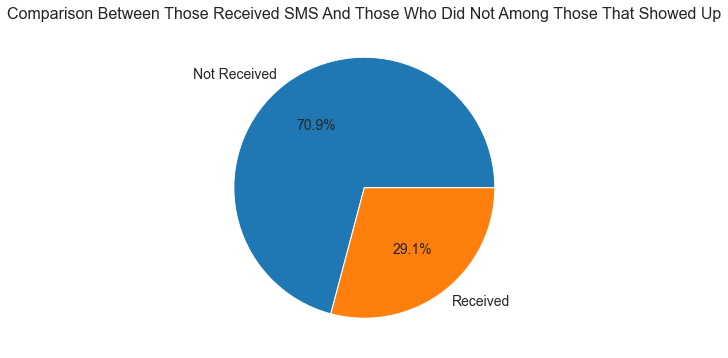

In [93]:
# Use pie chart to compare the effect of receiving or not receiving SMS on those who showed up for appointment.
showed = value_counter(df_show['SMS_received'])
plt.figure(figsize=(6,6))
plt.pie(showed, labels=('Not Received', 'Received'), autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Comparison Between Those Received SMS And Those Who Did Not Among Those That Showed Up', fontsize=16)
plt.show()

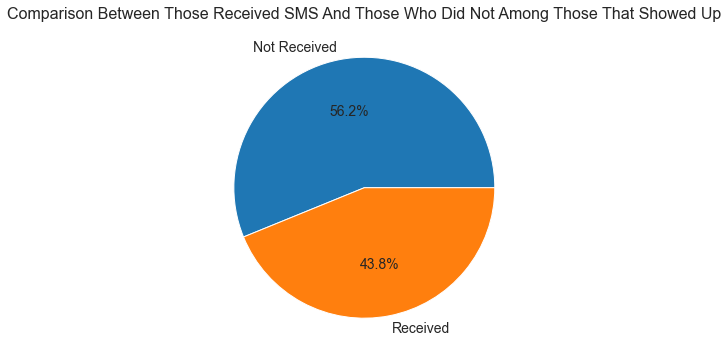

In [94]:
## Use pie chart to compare the effect of receiving or not receiving SMS on those who did not show up for appointment.
not_showed = value_counter(df_noshow['SMS_received'])
plt.figure(figsize=(6,6))
plt.pie(not_showed, labels=('Not Received', 'Received'), autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Comparison Between Those Received SMS And Those Who Did Not Among Those That Showed Up', fontsize=16)
plt.show()

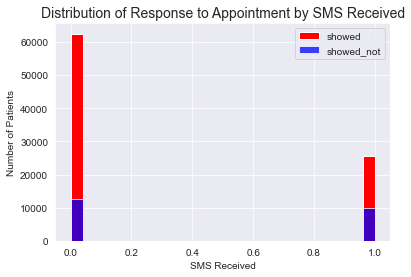

In [56]:
plt.hist(df_show['SMS_received'], 25, facecolor='r', alpha=1, label='showed');
plt.hist(df_noshow['SMS_received'], 25, facecolor='b', alpha=0.75, label='showed_not');
plt.legend()
plt.xlabel('SMS Received')
plt.ylabel('Number of Patients')
plt.title('Distribution of Response to Appointment by SMS Received', fontsize=14)
plt.grid(True)

A large number of persons who showed up for appointment didn't receive SMS, whereas for those patients who didn't show up for appointment, the difference betweeen the ones that received SMS and those who didn't is minimal. This goes to show that whether patients receive SMS or not, it doesn't affect their response to medical appointments

<a id='conclusions'></a>
## Conclusions

From the analysis of this interesting dataset, the dataset can be said to be clean to a very large extent with no missing values and duplicate rows.
In the EDA section, Several factors were considered in trying to predict if a patient will show up for appointment or not and they are  age, presence of ailments such as hypertension and diabetes, presence of alcoholism, presence of one or more handicap, and whether or not SMS was received. These variables were compared against a dependent variable which is the No_show variable. Some of my findings are given below.
    
    1.  About 79.8% of the patients showed up for their appointment whereas, only 20.2% didn't show up. 
    2.  Of the number of patients that showed up for the appointment, majority of them are females. This may be due to the fact that females tend to visit health facilities more often than male, hence the larger number of females in the dataset than males.
    3.   Majority of the patients are neither hypertensive nor diabetic. Most of them do not suffer from alcoholism either. The larger majority of those who showed up or didn't show up for appointment did not have hypertension, diabetes, nor alcoholism. These therefore do not determine the showing up of patients for their medical appointment.
    4.   Some patients had at least one handicap whereas a good number of them had no handicap. The majority of those who showed up for appointment and those who didn't do not have any form of handicap. Even those who had at least 1 handicap, majority of them showed up for appointment.  For instance, out of the 13 patients that had 3 forms of handicap, 10 of them showed up for appointment which only 3 did not show up. This shows that the number of handicap doesn't determine the response of the patients to their medical appointment.
    5.   The average age of the patients is 37. 25% of the patients are 18 whereas 75% are 56. The oldest is 115. There seem to be more babies and young adults than the older adults and elderly. Majority of patients who showed up or didn't show up are the younger ones. So i think it will be safe to say that the age distribution really doesn't determine the response of the patients to appointment.
    6.   About 32.1% of the patients received SMS while the other 67.9% did not. A large majority of those who did not receive SMS showed up for appointment whereas for those patients who didn't show up for appointment, the difference betweeen the ones who received SMS and those who didn't is minimal.

    One major limitation was the number of neighbourhood, that is where the appointment took place. I think it would have been better if the number was limited to just a few neighbourhoods.
    From my investigation, i think that these variables do not determine the patients' response to their medical appointment even though some of them may have had effect on those who didn't show up.



In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295